In [2]:
pip install plotly

  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/a5/07/5bef9376c975ce23306d9217ab69ca94c07f2a3c90b17c03e3ae4db87170/plotly-5.15.0-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 22.8 MB/s eta 0:00:00m eta 0:00:010:01:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import plotly.express as px

In [7]:
df = pd.read_csv('/Users/jaeyeon/Desktop/위험지수예측모델/data/세종시사고.csv')
df.head() #5행의 데이터 확인

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2022010200100246,2022년 1월 2일 17시,일요일,세종특별자치시 조치원읍,중상사고,0,1,0,0,차대사람 - 횡단중,...,맑음,교차로 - 교차로안,승용,여,74세,상해없음,보행자,남,58세,중상
1,2022010300100081,2022년 1월 3일 07시,월요일,세종특별자치시 어진동,경상사고,0,0,1,0,차대차 - 기타,...,맑음,단일로 - 기타,승용,남,69세,상해없음,승용,여,26세,경상
2,2022010300100318,2022년 1월 3일 14시,월요일,세종특별자치시 아름동,경상사고,0,0,1,0,차대사람 - 기타,...,맑음,기타 - 기타,승합,남,43세,상해없음,보행자,여,55세,경상
3,2022010500100442,2022년 1월 5일 21시,수요일,세종특별자치시 한솔동,경상사고,0,0,1,0,차대차 - 기타,...,맑음,단일로 - 기타,승용,남,49세,상해없음,승합,남,59세,상해없음
4,2022010500100459,2022년 1월 5일 22시,수요일,세종특별자치시 조치원읍,경상사고,0,0,1,0,차대사람 - 기타,...,맑음,단일로 - 기타,승용,남,23세,상해없음,보행자,여,81세,경상


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932 entries, 0 to 931
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   사고번호        932 non-null    int64 
 1   사고일시        932 non-null    object
 2   요일          932 non-null    object
 3   시군구         932 non-null    object
 4   사고내용        932 non-null    object
 5   사망자수        932 non-null    int64 
 6   중상자수        932 non-null    int64 
 7   경상자수        932 non-null    int64 
 8   부상신고자수      932 non-null    int64 
 9   사고유형        932 non-null    object
 10  법규위반        932 non-null    object
 11  노면상태        932 non-null    object
 12  기상상태        932 non-null    object
 13  도로형태        932 non-null    object
 14  가해운전자 차종    932 non-null    object
 15  가해운전자 성별    932 non-null    object
 16  가해운전자 연령    932 non-null    object
 17  가해운전자 상해정도  932 non-null    object
 18  피해운전자 차종    891 non-null    object
 19  피해운전자 성별    891 non-null    object
 20  피해운전자 연령  

In [9]:
sum = []
for i in range(len(df)):
    sum.append(df['사망자수'][i] + df['중상자수'][i]+df['경상자수'][i]+df['부상신고자수'][i])
df['사상자합계'] = sum

In [10]:
df.head()

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사상자합계
0,2022010200100246,2022년 1월 2일 17시,일요일,세종특별자치시 조치원읍,중상사고,0,1,0,0,차대사람 - 횡단중,...,교차로 - 교차로안,승용,여,74세,상해없음,보행자,남,58세,중상,1
1,2022010300100081,2022년 1월 3일 07시,월요일,세종특별자치시 어진동,경상사고,0,0,1,0,차대차 - 기타,...,단일로 - 기타,승용,남,69세,상해없음,승용,여,26세,경상,1
2,2022010300100318,2022년 1월 3일 14시,월요일,세종특별자치시 아름동,경상사고,0,0,1,0,차대사람 - 기타,...,기타 - 기타,승합,남,43세,상해없음,보행자,여,55세,경상,1
3,2022010500100442,2022년 1월 5일 21시,수요일,세종특별자치시 한솔동,경상사고,0,0,1,0,차대차 - 기타,...,단일로 - 기타,승용,남,49세,상해없음,승합,남,59세,상해없음,1
4,2022010500100459,2022년 1월 5일 22시,수요일,세종특별자치시 조치원읍,경상사고,0,0,1,0,차대사람 - 기타,...,단일로 - 기타,승용,남,23세,상해없음,보행자,여,81세,경상,1


In [13]:
df.to_csv("accident.csv",index = False, encoding="utf-8-sig")

In [14]:
X = df[['노면상태','기상상태','요일','도로형태','사상자합계']]

In [15]:
print(type(X))   

<class 'pandas.core.frame.DataFrame'>


In [19]:
df['시군구'].value_counts()

시군구
세종특별자치시 조치원읍    130
세종특별자치시 나성동      81
세종특별자치시 어진동      67
세종특별자치시 아름동      54
세종특별자치시 고운동      46
세종특별자치시 도담동      46
세종특별자치시 소담동      42
세종특별자치시 다정동      42
세종특별자치시 종촌동      40
세종특별자치시 대평동      37
세종특별자치시 금남면      37
세종특별자치시 새롬동      36
세종특별자치시 장군면      35
세종특별자치시 연기면      30
세종특별자치시 전의면      23
세종특별자치시 보람동      22
세종특별자치시 부강면      21
세종특별자치시 연서면      19
세종특별자치시 반곡동      19
세종특별자치시 한솔동      18
세종특별자치시 전동면      14
세종특별자치시 세종동      13
세종특별자치시 소정면      11
세종특별자치시 연동면      11
세종특별자치시 집현동      10
세종특별자치시 해밀동       8
세종특별자치시 산울동       6
세종특별자치시 가람동       6
세종특별자치시 합강동       4
세종특별자치시 한별동       2
세종특별자치시 다솜동       1
세종특별자치시 용호동       1
Name: count, dtype: int64

In [20]:
y =df['시군구']

In [21]:
print(type(y))

<class 'pandas.core.series.Series'>


In [24]:
pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/33/cb/0e41fad5b30fd66925e47952ddc720d078bdfd8397584a4873ec1cf590ca/scikit_learn-1.3.0-cp38-cp38-macosx_10_9_x86_64.whl.metadata
  Using cached scipy-1.10.1-cp38-cp38-macosx_10_9_x86_64.whl (35.0 MB)
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 12.7 MB/s eta 0:00:00m eta 0:00:01:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 29.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [38]:
from sklearn.preprocessing import LabelEncoder

In [41]:
df['노면상태'].unique()

array(['건조', '젖음/습기', '서리/결빙', '기타', '해빙', '적설'], dtype=object)

In [42]:
df['노면상태'].unique().tolist()

['건조', '젖음/습기', '서리/결빙', '기타', '해빙', '적설']

In [43]:
df['노면상태'].unique().tolist().index('건조')

0

In [50]:
temp_list =df['노면상태'].unique().tolist()
df['노면상태'].map(lambda x : temp_list.index(x))

0      0
1      0
2      0
3      0
4      0
      ..
927    0
928    0
929    0
930    0
931    0
Name: 노면상태, Length: 932, dtype: int64

In [51]:
df.insert(12, '노면상태_label', df['노면상태'].map(lambda x : temp_list.index(x)))

In [52]:
df.tail()

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사상자합계
927,2022123000100016,2022년 12월 30일 00시,금요일,세종특별자치시 조치원읍,중상사고,0,1,2,0,차대차 - 기타,...,교차로 - 교차로부근,승용,남,58세,상해없음,승용,남,56세,경상,3
928,2022123000100017,2022년 12월 30일 00시,금요일,세종특별자치시 금남면,경상사고,0,0,2,0,차대차 - 추돌,...,단일로 - 기타,승용,남,58세,상해없음,승용,남,56세,경상,2
929,2022123000100415,2022년 12월 30일 16시,금요일,세종특별자치시 아름동,경상사고,0,0,1,1,차대사람 - 횡단중,...,교차로 - 교차로부근,개인형이동수단(PM),남,17세,부상신고,보행자,남,15세,경상,2
930,2022123000100675,2022년 12월 30일 22시,금요일,세종특별자치시 소담동,경상사고,0,0,2,0,차대차 - 측면충돌,...,교차로 - 교차로안,이륜,남,30세,경상,승용,여,51세,경상,2
931,2022123100100137,2022년 12월 31일 09시,토요일,세종특별자치시 해밀동,경상사고,0,0,2,0,차대차 - 측면충돌,...,교차로 - 교차로안,이륜,남,24세,경상,승용,남,33세,경상,2


In [53]:
df1 = df.loc[:,['사고일시','요일','시군구','노면상태','노면상태_label','기상상태','도로형태','사상자합계']]

In [54]:
df1.tail()

,사고일시,요일,시군구,노면상태,노면상태_label,기상상태,도로형태,사상자합계
927,2022년 12월 30일 00시,금요일,세종특별자치시 조치원읍,건조,0,맑음,교차로 - 교차로부근,3
928,2022년 12월 30일 00시,금요일,세종특별자치시 금남면,건조,0,기타,단일로 - 기타,2
929,2022년 12월 30일 16시,금요일,세종특별자치시 아름동,건조,0,흐림,교차로 - 교차로부근,2
930,2022년 12월 30일 22시,금요일,세종특별자치시 소담동,건조,0,맑음,교차로 - 교차로안,2
931,2022년 12월 31일 09시,토요일,세종특별자치시 해밀동,건조,0,맑음,교차로 - 교차로안,2


In [55]:
df1['기상상태'].unique()

array(['맑음', '흐림', '눈', '기타', '비', '안개'], dtype=object)

In [56]:
temp_list2 =df1['기상상태'].unique().tolist()

In [63]:
df1.insert(6, '기상상태_label', df1['기상상태'].map(lambda x : temp_list2.index(x)))

ValueError: cannot insert 기상상태_label, already exists

In [64]:
df1

,사고일시,요일,시군구,노면상태,노면상태_label,기상상태,도로형태,기상상태_label,사상자합계
0,2022년 1월 2일 17시,일요일,세종특별자치시 조치원읍,건조,0,맑음,교차로 - 교차로안,0,1
1,2022년 1월 3일 07시,월요일,세종특별자치시 어진동,건조,0,맑음,단일로 - 기타,0,1
2,2022년 1월 3일 14시,월요일,세종특별자치시 아름동,건조,0,맑음,기타 - 기타,0,1
3,2022년 1월 5일 21시,수요일,세종특별자치시 한솔동,건조,0,맑음,단일로 - 기타,0,1
4,2022년 1월 5일 22시,수요일,세종특별자치시 조치원읍,건조,0,맑음,단일로 - 기타,0,1
...,...,...,...,...,...,...,...,...,...
927,2022년 12월 30일 00시,금요일,세종특별자치시 조치원읍,건조,0,맑음,교차로 - 교차로부근,0,3
928,2022년 12월 30일 00시,금요일,세종특별자치시 금남면,건조,0,기타,단일로 - 기타,3,2
929,2022년 12월 30일 16시,금요일,세종특별자치시 아름동,건조,0,흐림,교차로 - 교차로부근,1,2
930,2022년 12월 30일 22시,금요일,세종특별자치시 소담동,건조,0,맑음,교차로 - 교차로안,0,2


In [66]:
df1['도로형태'].unique()

array(['교차로 - 교차로안', '단일로 - 기타', '기타 - 기타', '단일로 - 고가도로위', '교차로 - 교차로부근',
       '주차장 - 주차장', '단일로 - 터널', '교차로 - 교차로횡단보도내', '단일로 - 지하차도(도로)내',
       '단일로 - 교량'], dtype=object)

In [65]:
df1['요일'].unique()

array(['일요일', '월요일', '수요일', '목요일', '금요일', '화요일', '토요일'], dtype=object)

In [67]:
temp_list3 =df1['도로형태'].unique().tolist()
df1.insert(8, '도로형태_label', df1['도로형태'].map(lambda x : temp_list3.index(x)))

In [68]:
temp_list4 =df1['요일'].unique().tolist()
df1.insert(3, '요일_label', df1['요일'].map(lambda x : temp_list4.index(x)))

In [69]:
df1

,사고일시,요일,시군구,요일_label,노면상태,노면상태_label,기상상태,도로형태,기상상태_label,도로형태_label,사상자합계
0,2022년 1월 2일 17시,일요일,세종특별자치시 조치원읍,0,건조,0,맑음,교차로 - 교차로안,0,0,1
1,2022년 1월 3일 07시,월요일,세종특별자치시 어진동,1,건조,0,맑음,단일로 - 기타,0,1,1
2,2022년 1월 3일 14시,월요일,세종특별자치시 아름동,1,건조,0,맑음,기타 - 기타,0,2,1
3,2022년 1월 5일 21시,수요일,세종특별자치시 한솔동,2,건조,0,맑음,단일로 - 기타,0,1,1
4,2022년 1월 5일 22시,수요일,세종특별자치시 조치원읍,2,건조,0,맑음,단일로 - 기타,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
927,2022년 12월 30일 00시,금요일,세종특별자치시 조치원읍,4,건조,0,맑음,교차로 - 교차로부근,0,4,3
928,2022년 12월 30일 00시,금요일,세종특별자치시 금남면,4,건조,0,기타,단일로 - 기타,3,1,2
929,2022년 12월 30일 16시,금요일,세종특별자치시 아름동,4,건조,0,흐림,교차로 - 교차로부근,1,4,2
930,2022년 12월 30일 22시,금요일,세종특별자치시 소담동,4,건조,0,맑음,교차로 - 교차로안,0,0,2


In [70]:
df1.to_csv("accident_labeling.csv",index = False, encoding="utf-8-sig")

In [80]:
temp_list5 =df1['시군구'].unique().tolist()

In [81]:
temp_list5

['세종특별자치시 조치원읍',
 '세종특별자치시 어진동',
 '세종특별자치시 아름동',
 '세종특별자치시 한솔동',
 '세종특별자치시 새롬동',
 '세종특별자치시 소담동',
 '세종특별자치시 고운동',
 '세종특별자치시 연동면',
 '세종특별자치시 다정동',
 '세종특별자치시 집현동',
 '세종특별자치시 나성동',
 '세종특별자치시 연기면',
 '세종특별자치시 종촌동',
 '세종특별자치시 소정면',
 '세종특별자치시 장군면',
 '세종특별자치시 전동면',
 '세종특별자치시 부강면',
 '세종특별자치시 보람동',
 '세종특별자치시 세종동',
 '세종특별자치시 도담동',
 '세종특별자치시 금남면',
 '세종특별자치시 연서면',
 '세종특별자치시 산울동',
 '세종특별자치시 대평동',
 '세종특별자치시 전의면',
 '세종특별자치시 반곡동',
 '세종특별자치시 해밀동',
 '세종특별자치시 합강동',
 '세종특별자치시 가람동',
 '세종특별자치시 다솜동',
 '세종특별자치시 용호동',
 '세종특별자치시 한별동']

In [82]:
temp_list5 =df1['시군구'].unique().tolist()
df1.insert(1, '시군구_label', df1['시군구'].map(lambda x : temp_list5.index(x)))

In [161]:
df2=df1.loc[:,['요일_label','시군구_label','노면상태_label','기상상태_label','도로형태_label','사상자합계']]

In [162]:
# 정규분포를 따르도록 표준화 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ord_data_scaled = scaler.fit_transform(df2)

pd.DataFrame(df2, columns = df2.columns).head()

,요일_label,시군구_label,노면상태_label,기상상태_label,도로형태_label,사상자합계
0,0,0,0,0,0,1
1,1,1,0,0,1,1
2,1,2,0,0,2,1
3,2,3,0,0,1,1
4,2,0,0,0,1,1


In [163]:
df2['시군구_label'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [178]:
X = df2[['시군구_label','노면상태_label','기상상태_label','요일_label','도로형태_label']]

In [179]:
y =df2['사상자합계']

In [180]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)
print('훈련 데이터: ', X_train.shape)
print('검증 데이터:', X_test.shape)

훈련 데이터:  (745, 5)
검증 데이터: (187, 5)


In [182]:
def rmsle(y, pred):
		# y : 전체 데이터의 실제값의 리스트 ex) [1, 2, 3, 4]
		# pred : 전체 데이터의 예측값의 리스트 ex) [0.97, 1.85, 2.99, 3.87]
		
		# np.log1p : 입력값에 +1을 한 후 log를 씌운다.
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)

		# 실제값과 예측값의의 차이의 제곱
    squared_error = (log_y - log_pred) ** 2

		# 모든 데이터에 대해 평균을 구한 후(np.mean())
		# 루트를 씌워준다(np.sqrt())
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

In [183]:
from sklearn.metrics import mean_squared_error

def rmse(y, pred):
# 평균 제곱 오차, MSE에 루트를 씌운다.
    return np.sqrt(mean_squared_error(y, pred))

In [184]:
# RMSLE, RMSE 계산
def calculate_model_score(y, pred):
    rmsle_value = rmsle(y, pred)
    rmse_value = rmse(y, pred)
    print(f'RMSLE: {rmsle_value:.3f}, RMSE: {rmse_value:.3f}')

In [185]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

# 로그 변환 된건 다시 expm1 이용
y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)

calculate_model_score(y_test_exp, pred_exp)

RMSLE: 1.044, RMSE: 593.843


In [186]:
# 이를 적용하여 다시 학습 후 평가 필요 
y_log_transform = np.log1p(y)

# 데이터가 바뀌었으므로 훈련 데이터와 테스트 데이터를 다시 분리
x_train, x_test, y_train, y_test = train_test_split(X, y_log_transform,
                                                   test_size = .2,
                                                   random_state = 777)

In [187]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [188]:
# 로그 변환 된건 다시 expm1 이용
y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)

calculate_model_score(y_test_exp, pred_exp)

RMSLE: 0.276, RMSE: 1.021


In [203]:
print(lr.score(X_test, y_test))
print(lr.score(X_train, y_train))

-0.022422191507806666
0.009669193235894324


In [189]:
coefs = pd.DataFrame(zip(X.columns, lr.coef_), columns = ['feature', 'coefficients'])
coefs = coefs.sort_values(by=['coefficients'], ascending=False).reset_index(drop=True)

In [190]:
coefs

,feature,coefficients
0,기상상태_label,0.014897
1,시군구_label,0.002664
2,도로형태_label,-0.002011
3,요일_label,-0.008209
4,노면상태_label,-0.022492


<Axes: >

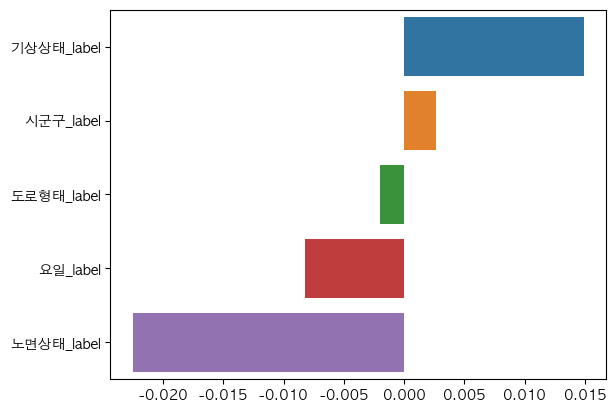

In [191]:
import seaborn as sns

sns.barplot(x=coefs['coefficients'][:20].values, y=coefs['feature'][:20].values)

In [ ]:
# 릿지 회귀

In [204]:
# 릿지회귀 함수 임포트, 학습 진행
from sklearn.linear_model import Ridge

rg = Ridge(alpha=2.5)
rg.fit(X_train, y_train)



print(rg.score(X_test, y_test))
print(rg.score(X_train, y_train))

-0.022287876909988347
0.00966879431504708


In [205]:
# 라쏘회귀 함수 임포트, 학습 진행
from sklearn.linear_model import Lasso

ls = Lasso(alpha=0.1)
ls.fit(X_train, y_train)

print(ls.score(X_test, y_test))
print(ls.score(X_train, y_train))

-0.011467927183133497
0.0031195195757933725


In [192]:
lr.fit(X_train,y_train)

LinearRegression()

In [193]:
r_square = lr.score(X_test, y_test)
r_square

-0.022422191507806666

In [194]:
print("회귀식의 기울기 (a)", lr.coef_)

회귀식의 기울기 (a) [ 0.00266403 -0.02249221  0.01489706 -0.00820908 -0.00201147]


In [195]:
print("회귀식의 y절편 (b)", lr.intercept_)

회귀식의 y절편 (b) 0.8456805304043347


In [196]:
y_hat = lr.predict(X_test)

In [197]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


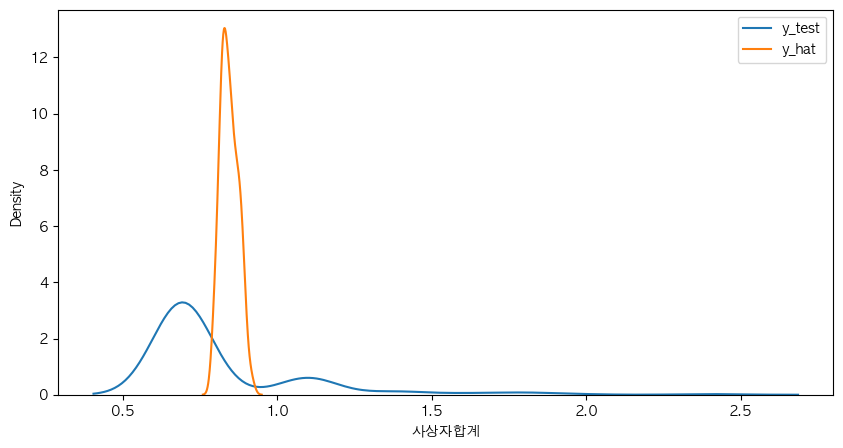

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc  ### 이 줄과
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10,5))
ax1 = sns.kdeplot(y_test, label="y_test") 
ax2 = sns.kdeplot(y_hat, label='y_hat', ax=ax1)
plt.legend()
plt.show()

In [199]:
y_hat = lr.predict(X)

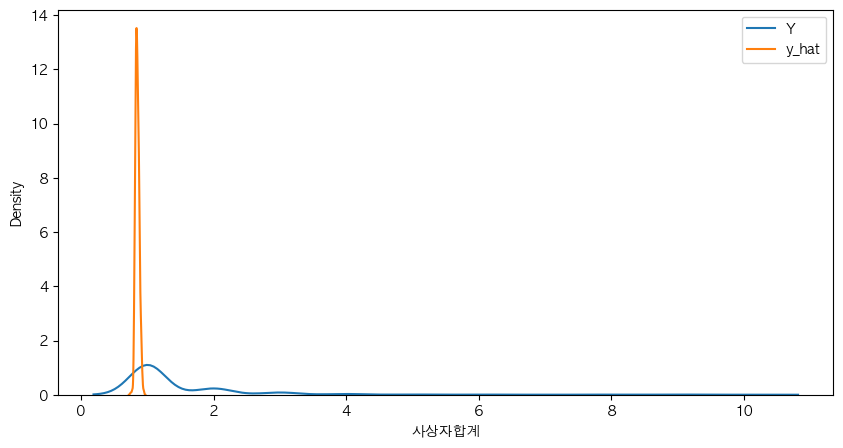

In [200]:
plt.figure(figsize=(10,5))
ax1 = sns.kdeplot(y, label="Y")
ax2 = sns.kdeplot(y_hat, label='y_hat', ax=ax1)
plt.legend()
plt.show()

In [206]:
df2.head()

,요일_label,시군구_label,노면상태_label,기상상태_label,도로형태_label,사상자합계
0,0,0,0,0,0,1
1,1,1,0,0,1,1
2,1,2,0,0,2,1
3,2,3,0,0,1,1
4,2,0,0,0,1,1


In [207]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932 entries, 0 to 931
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   요일_label    932 non-null    int64
 1   시군구_label   932 non-null    int64
 2   노면상태_label  932 non-null    int64
 3   기상상태_label  932 non-null    int64
 4   도로형태_label  932 non-null    int64
 5   사상자합계       932 non-null    int64
dtypes: int64(6)
memory usage: 43.8 KB


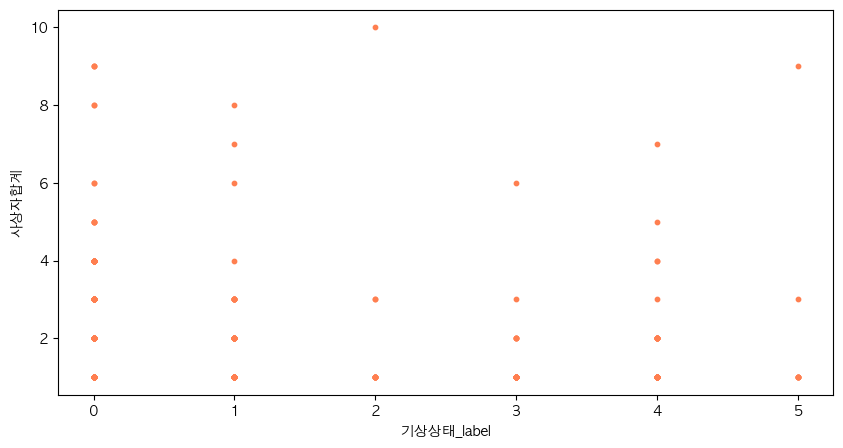

In [210]:
df2.plot(kind='scatter', x ='기상상태_label', y='사상자합계', c='coral', s=10, figsize=(10,5))
plt.show()

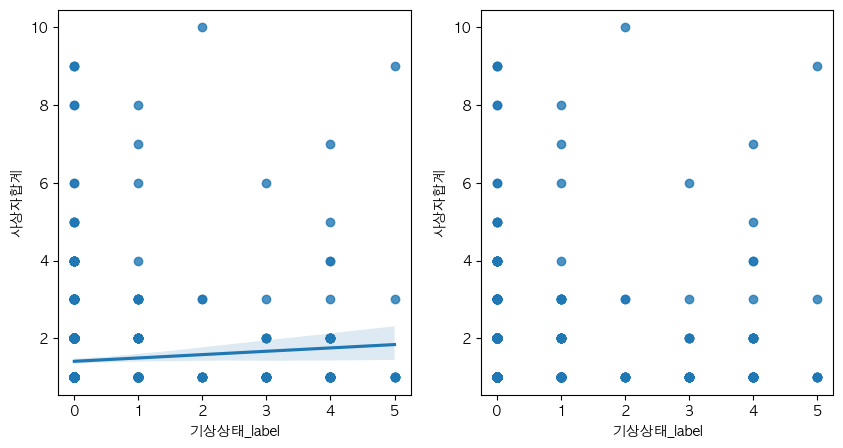

In [212]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.regplot(x ='기상상태_label', y='사상자합계',data = df2, ax= ax1)
sns.regplot(x ='기상상태_label', y='사상자합계',data = df2, ax= ax2, fit_reg=False)
plt.show()

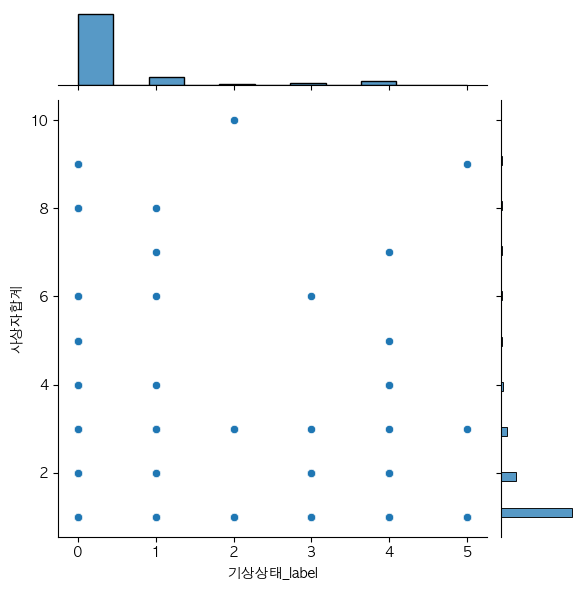

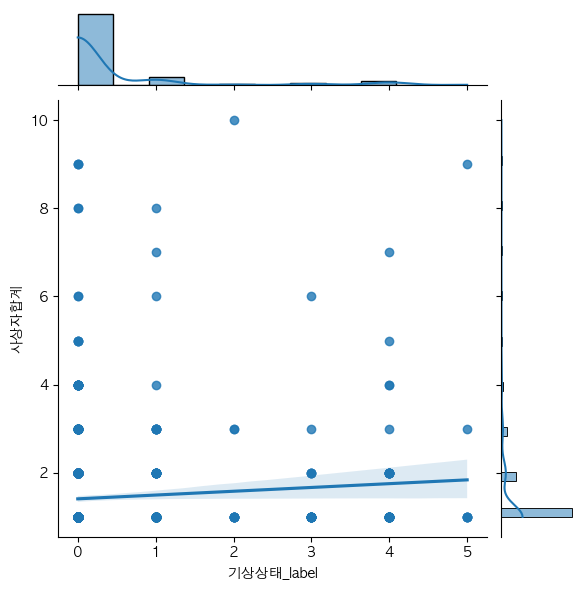

In [214]:
sns.jointplot(x ='기상상태_label', y='사상자합계',data = df2)
sns.jointplot(x ='기상상태_label', y='사상자합계',kind='reg',data = df2)
plt.show()

/opt/anaconda3/envs/jupyter/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


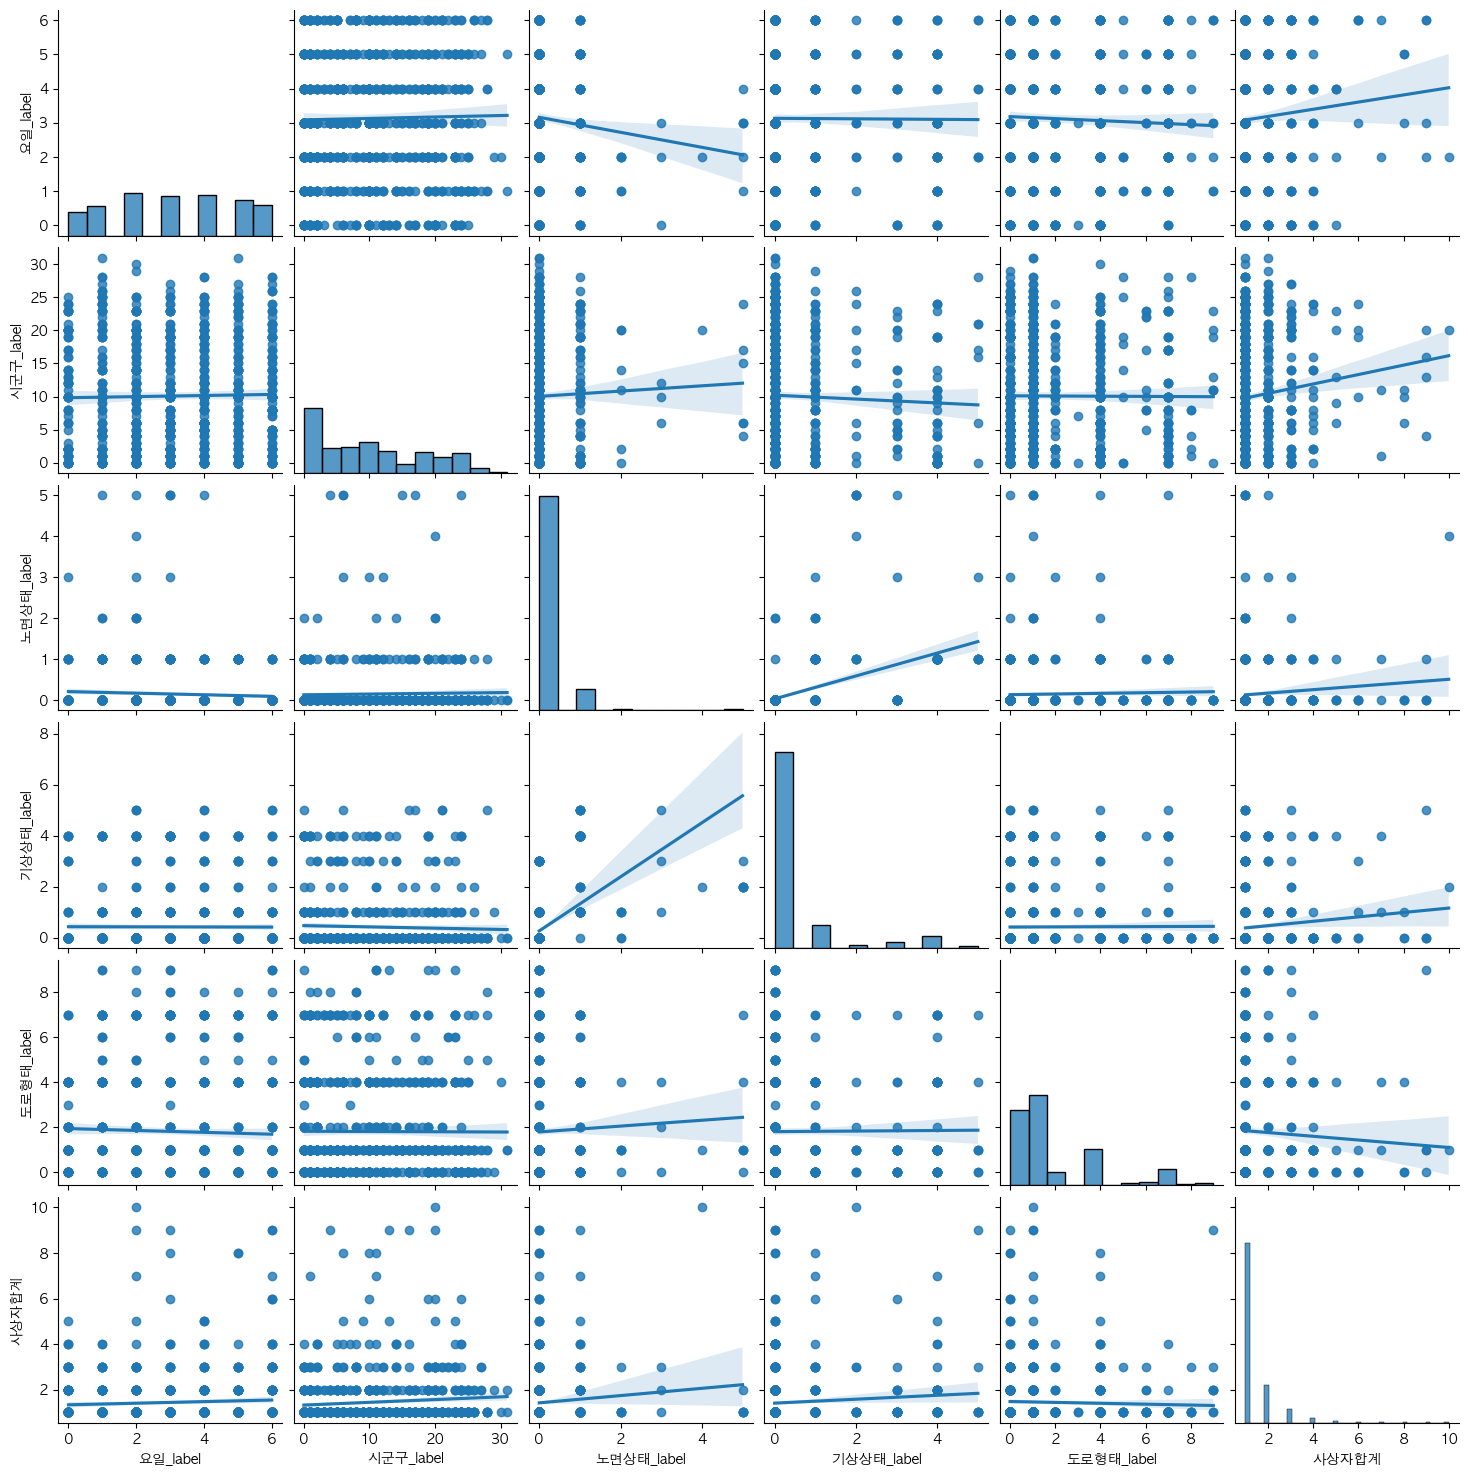

In [215]:
sns.pairplot(df2, kind='reg')
plt.show()